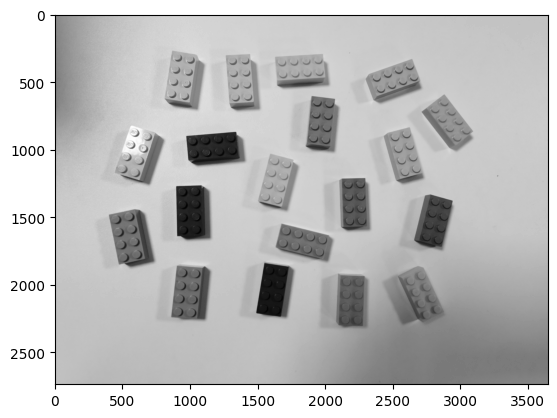

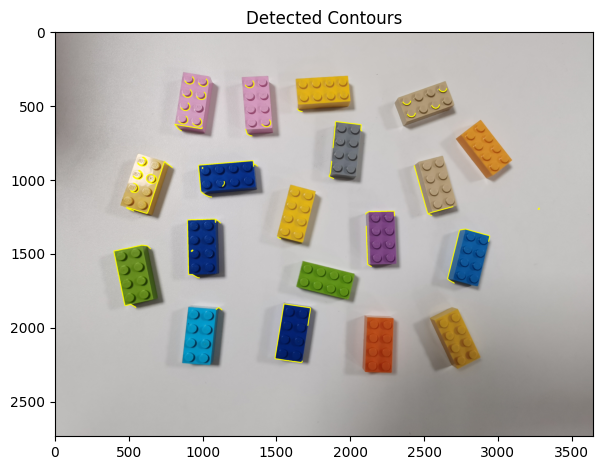

In [2]:
# Canny

import numpy as np
from matplotlib import pyplot as plt
import cv2

image = cv2.imread("../test_images/1.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 光滑
gray = cv2.GaussianBlur(gray, (7, 7), 0)

plt.figure(1)
plt.imshow(gray, cmap='gray')

# Canny
median_val = np.median(gray)    # 用中值灰度选择Canny阈值
lower_threshold = int(max(0, 0.5 * median_val))
upper_threshold = int(min(255, 1.2 * median_val))

edges = cv2.Canny(gray, lower_threshold, upper_threshold)
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
image_contours = image.copy()
cv2.drawContours(image_contours, contours, -1, (0, 255, 255), 5)

plt.figure(2)
plt.imshow(cv2.cvtColor(image_contours, cv2.COLOR_BGR2RGB))
plt.title('Detected Contours')

plt.tight_layout()
plt.show()



In [ ]:
# Sobel for color
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '../test_images/4.jpg'
image = cv2.imread(image_path)

# Convert to float for more precision before applying the Sobel operator
image = np.float32(image)

# Initialize gradients
grad_x = np.zeros(image.shape, dtype=np.float32)
grad_y = np.zeros(image.shape, dtype=np.float32)

# Apply Sobel operator to each color channel independently
for i in range(3):  # Loop over the color channels
    grad_x[:, :, i] = cv2.Sobel(image[:, :, i], cv2.CV_32F, 1, 0, ksize=3)
    grad_y[:, :, i] = cv2.Sobel(image[:, :, i], cv2.CV_32F, 0, 1, ksize=3)

# Combine the gradients
grad_magnitude = cv2.magnitude(grad_x, grad_y)

# Normalize to uint8
grad_magnitude = cv2.normalize(grad_magnitude, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Convert back to BGR for display
grad_magnitude_bgr = cv2.cvtColor(grad_magnitude, cv2.COLOR_GRAY2BGR)

# Display the result
plt.imshow(cv2.cvtColor(grad_magnitude_bgr, cv2.COLOR_BGR2RGB))
plt.title('Color Sobel Edge Detection')
plt.axis('off')
plt.show()
